In [8]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['agg.path.chunksize'] = 10000

In [9]:
# Reading the clean csv file
df = pd.read_csv(r'Clean_QV_Data.csv')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,Woolworths,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,CCs,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget


In [10]:
df.shape

(246740, 12)

In [11]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'BRAND_NAME', 'PACK_SIZE',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [12]:
# Calculating total sales by Lifestage of Customer
SalesbyLifestage = pd.pivot_table(df, index = 'LIFESTAGE', values = 'TOT_SALES', aggfunc = np.sum).sort_values(by='TOT_SALES', ascending = False)
SalesbyLifestage = SalesbyLifestage.reset_index()

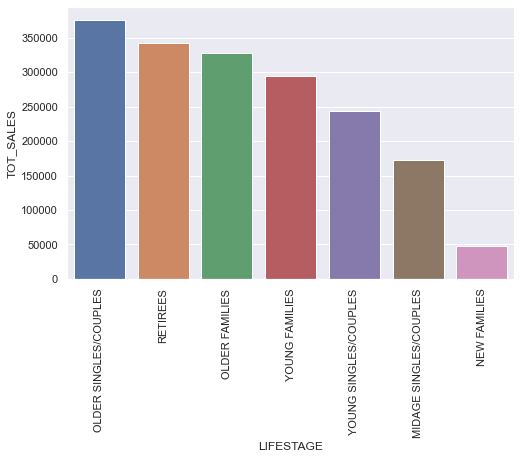

In [13]:
# Total Sales by Lifestage of Customer
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data = SalesbyLifestage, x = 'LIFESTAGE', y = 'TOT_SALES')
plt.xticks(rotation = 90)
plt.show()

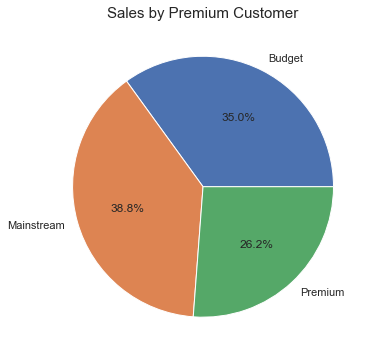

In [14]:
# Sales by Premium Customer
SalesbyPremCust = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
fig, ax = plt.subplots(figsize=(10,6))
plt.pie(x = SalesbyPremCust, autopct = '%0.1f%%', labels = SalesbyPremCust.index )
plt.title('Sales by Premium Customer', fontsize=15)
plt.show()

In [61]:
df_selection = df[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES']]
df_selection_gb = df_selection.groupby(by=['LIFESTAGE', 'PREMIUM_CUSTOMER'],as_index=False).count()
df_selection_pivot = df_selection_gb.pivot(index='LIFESTAGE', columns = 'PREMIUM_CUSTOMER').rename({'TOT_SALES':''},axis = 1,inplace=False)
df_selection_pivot

PREMIUM_CUSTOMER       Budget Mainstream Premium
LIFESTAGE                                       
MIDAGE SINGLES/COUPLES   4691      11095    7612
NEW FAMILIES             2824       2185    1488
OLDER FAMILIES          21514      13241   10403
OLDER SINGLES/COUPLES   17172      17061   16560
RETIREES                14225      19970   12236
YOUNG FAMILIES          17763      11947   10784
YOUNG SINGLES/COUPLES    8573      19544    5852

In [81]:
df.shape[0]

246740

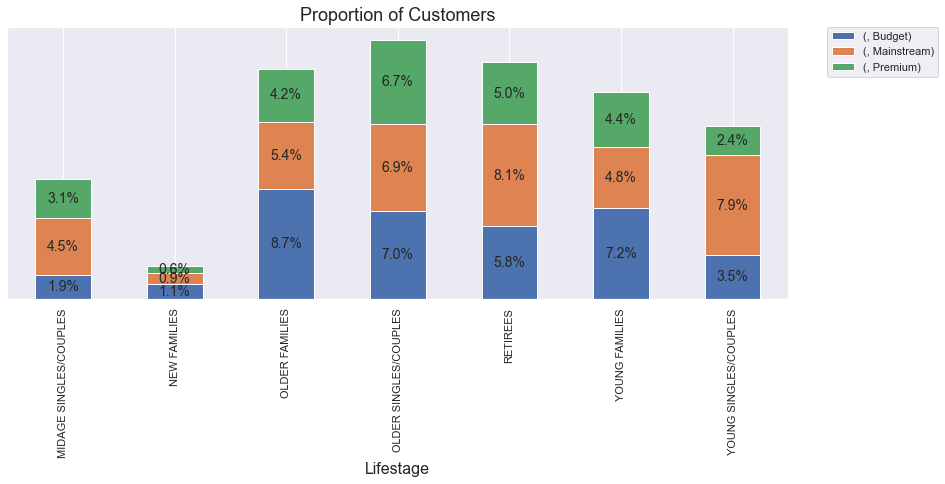

In [84]:
sns.set()
ax = df_selection_pivot.plot(kind = 'bar', stacked=True, legend=False, figsize = (14,5))

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    label_text = '{:.1%}'.format(height/df.shape[0])
    label_x = x + width / 2
    label_y = y + height / 2 
    ax.text(label_x, label_y, label_text, ha='center', va='center',  fontsize = 14)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
ax.set_title('Proportion of Customers', fontsize=18)
ax.set_xlabel('Lifestage', fontsize=16)
ax.set_yticks([])
plt.show()